# CLUSTERING ANALYSIS 

Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.
Datasets :
Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset
Implementing Clustering Algorithms:ko
•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

Cluster Analysis and Interpretation:
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques.
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.
Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name= 'data' )

In [3]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

 ## Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset


In [4]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [7]:
for i in df.isna().sum():
    print(round(i/len(df)*100, 2), '%')

0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


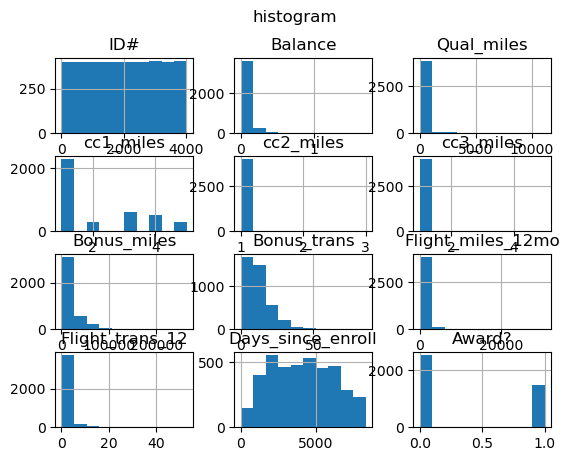

In [9]:
df.hist()
plt.suptitle("histogram")
plt.show()

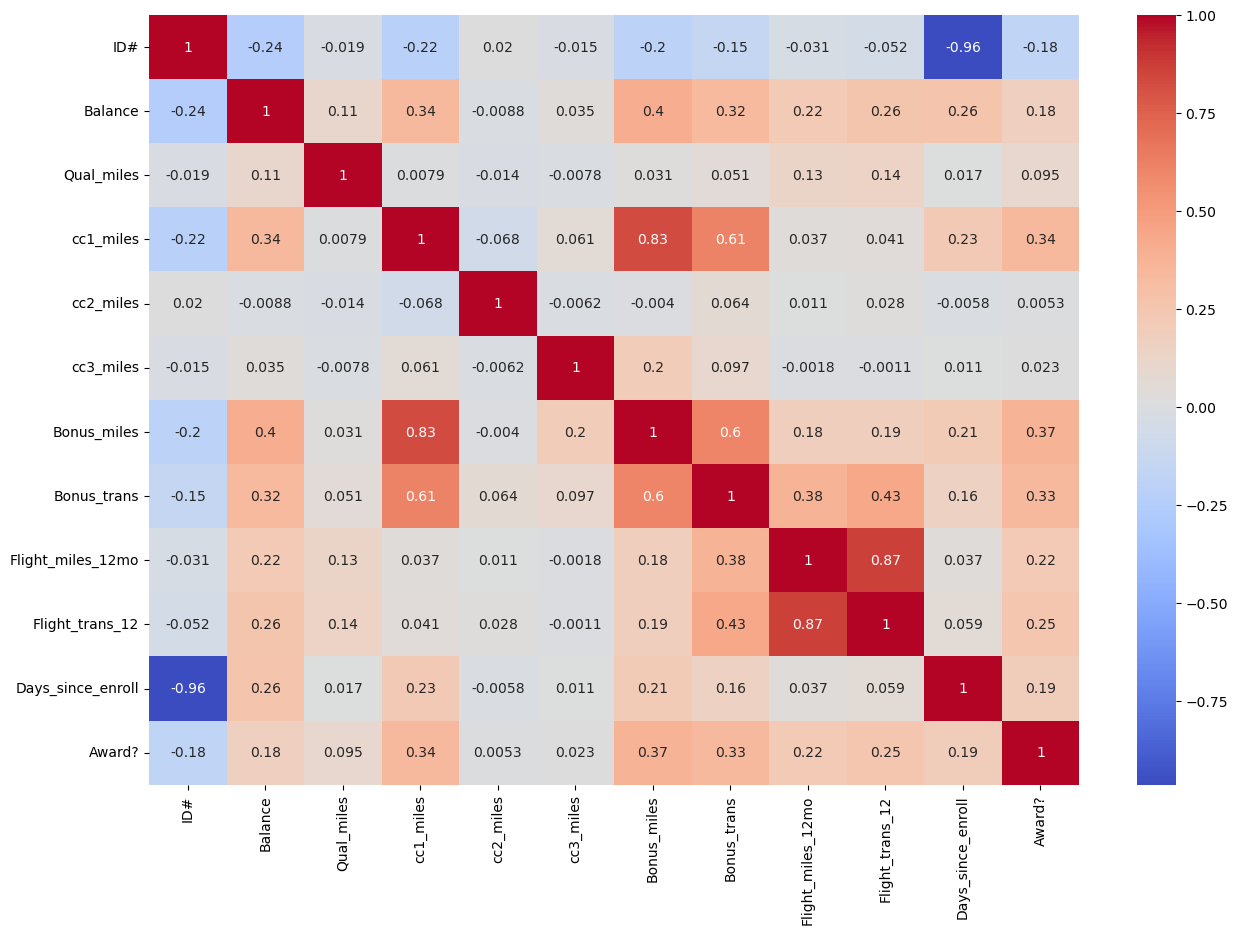

In [10]:

plt.figure(figsize= (15, 10))
sns.heatmap(df.corr(), cmap= 'coolwarm', annot= True)
plt.show()


In [11]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

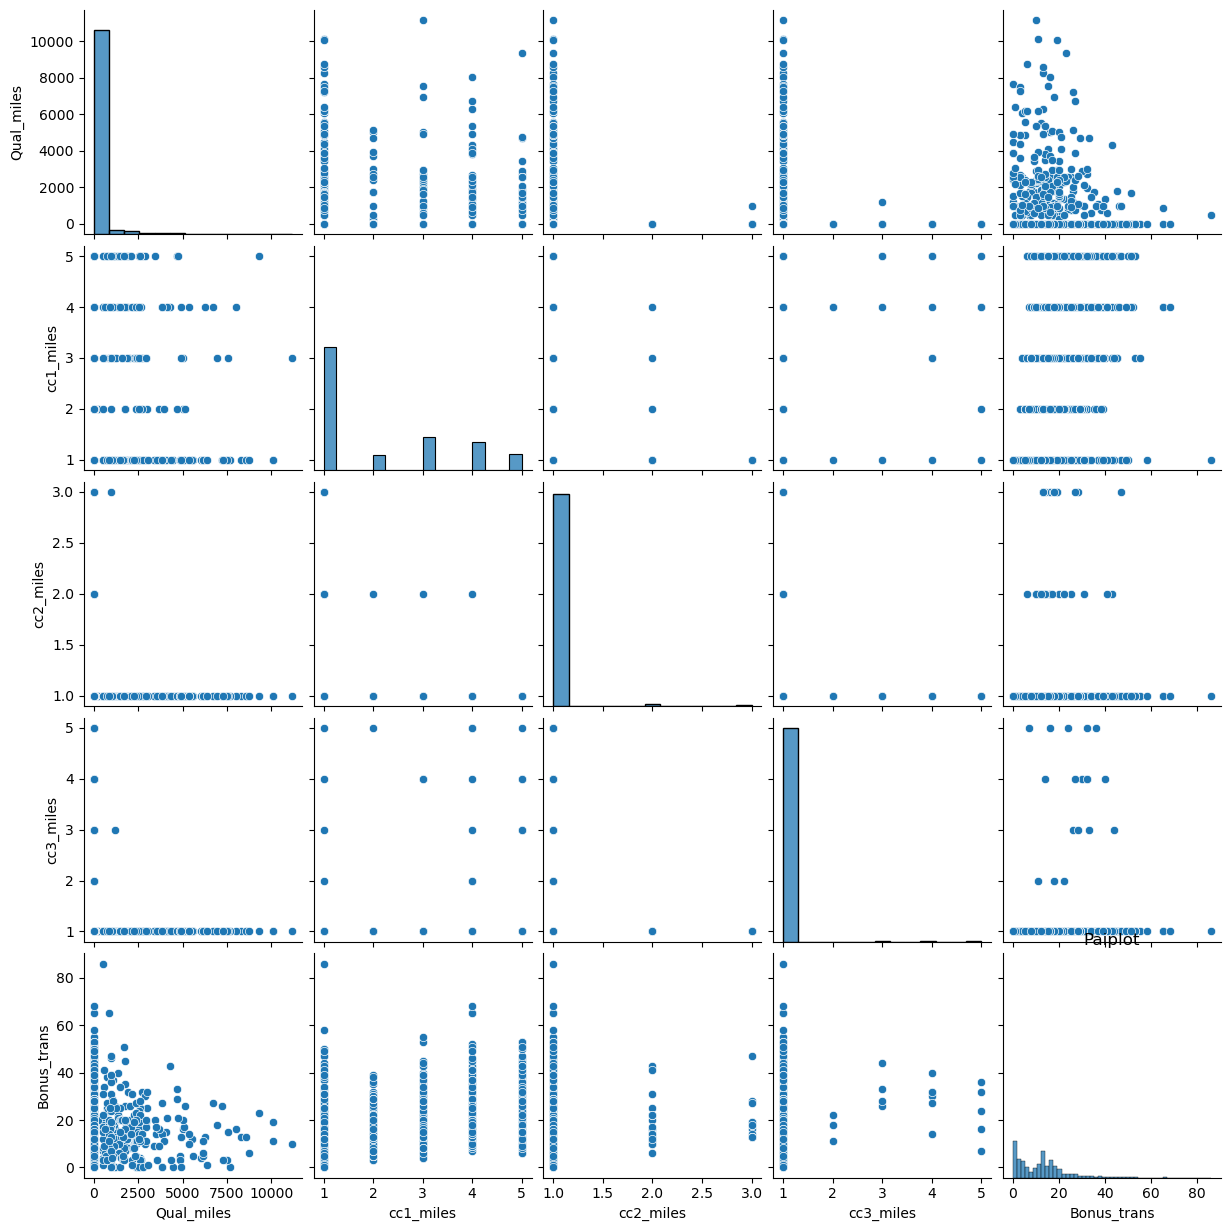

In [12]:
cols = ['Qual_miles', 'cc1_miles','cc2_miles','cc3_miles','Bonus_trans']
sns.pairplot(df[cols])
plt.title("Paiplot")
plt.show()

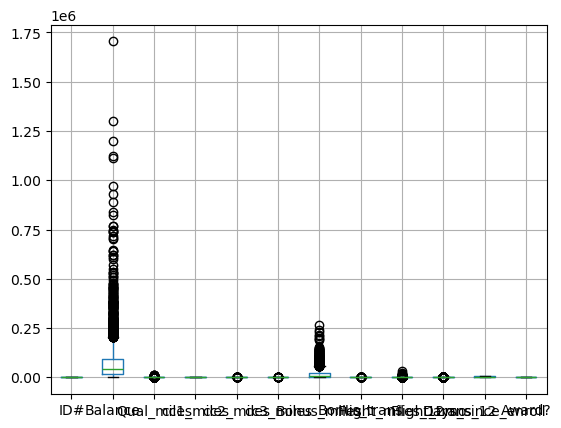

In [13]:
df.boxplot()
plt.show()

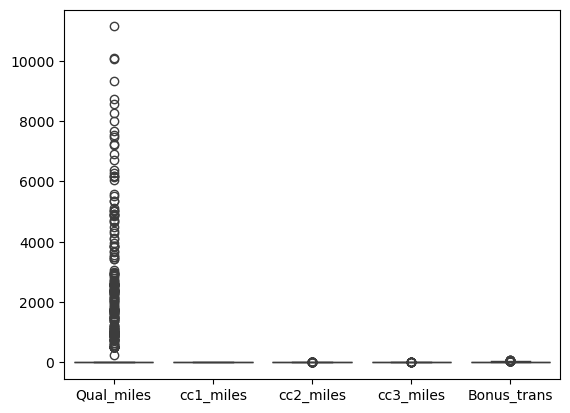

In [14]:
sns.boxplot(df[cols])
plt.show()

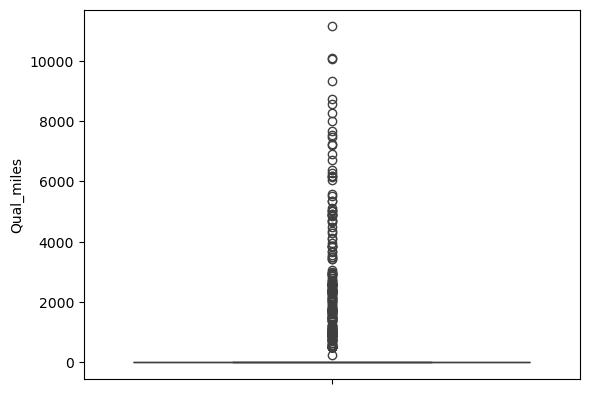

In [15]:
sns.boxplot(df['Qual_miles'])
plt.show()

In [16]:
df.duplicated().sum()

0

In [17]:
import plotly.express as pe

In [18]:
pe.scatter_3d(data_frame= df, x= 'Qual_miles', y='cc2_miles', z= 'cc3_miles')

In [19]:
df['Qual_miles'].nunique()

164

In [20]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [21]:
df.max()

ID#                     4021
Balance              1704838
Qual_miles             11148
cc1_miles                  5
cc2_miles                  3
cc3_miles                  5
Bonus_miles           263685
Bonus_trans               86
Flight_miles_12mo      30817
Flight_trans_12           53
Days_since_enroll       8296
Award?                     1
dtype: int64

In [22]:
df.min()

ID#                  1
Balance              0
Qual_miles           0
cc1_miles            1
cc2_miles            1
cc3_miles            1
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    2
Award?               0
dtype: int64

d = df.max() - df.min()
d

## Implementing Clustering Algorithms:
•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.


In [23]:
from scipy.cluster import hierarchy

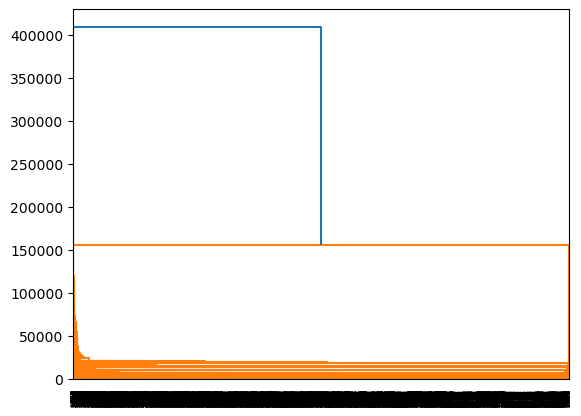

In [24]:
x= df.drop(columns= ['ID#'])

lk = hierarchy.linkage(x, method = 'single') 
dendrogram = hierarchy.dendrogram(lk)
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

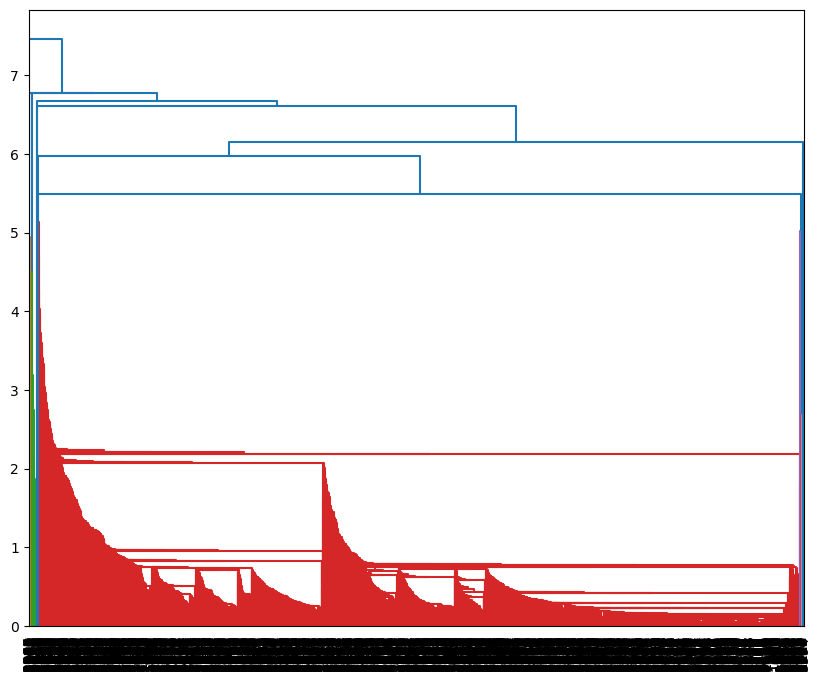

In [26]:
sc= StandardScaler()
data = df.drop(columns = ['ID#'])
X = sc.fit_transform(data)

rr = hierarchy.linkage(X, method= 'single')
plt.figure(figsize =(10,8))
dendrogram= hierarchy.dendrogram(rr, leaf_rotation = 90, leaf_font_size = 10)
plt.show()


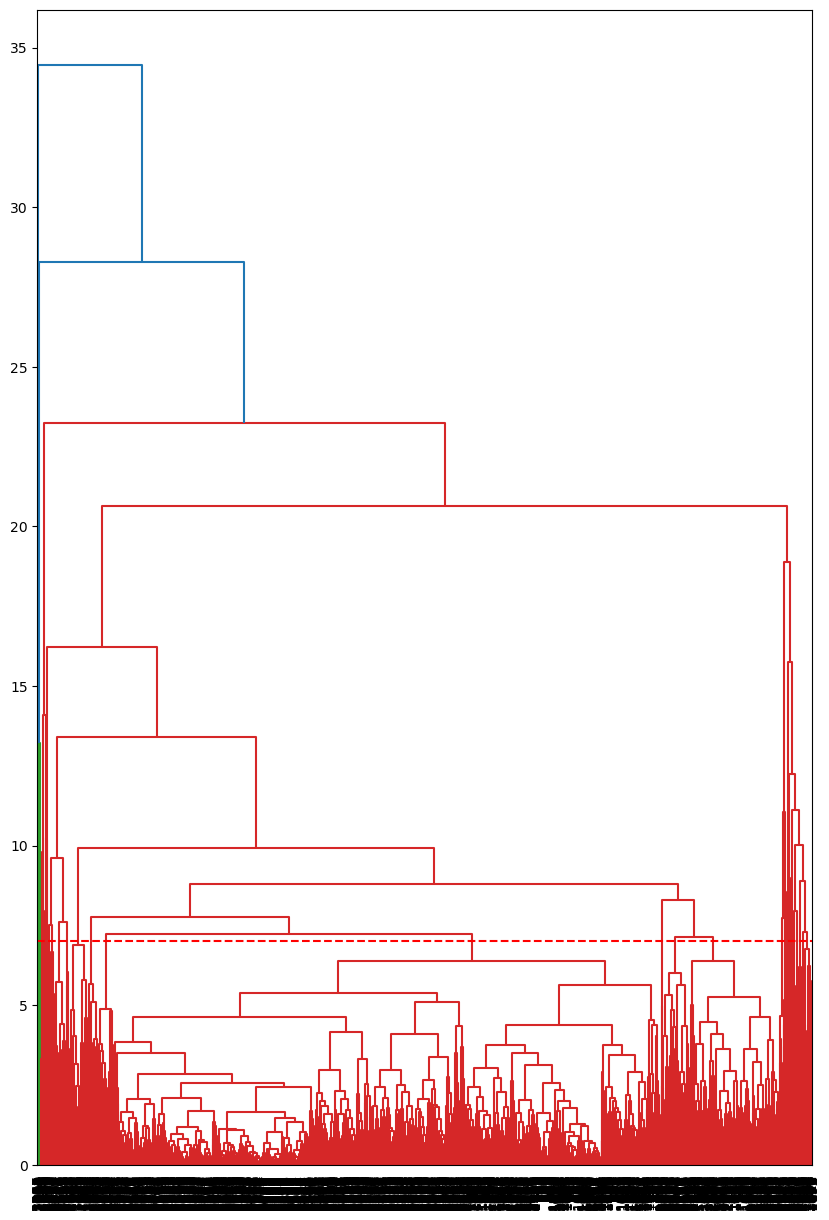

In [27]:
lk = hierarchy.linkage(X, method = 'complete')
plt.figure(figsize= (10,15))
dendrogram = hierarchy.dendrogram(lk, leaf_rotation= 90, leaf_font_size= 10)
plt.axhline(y = 7, linestyle= '--', color= 'red')
plt.show()

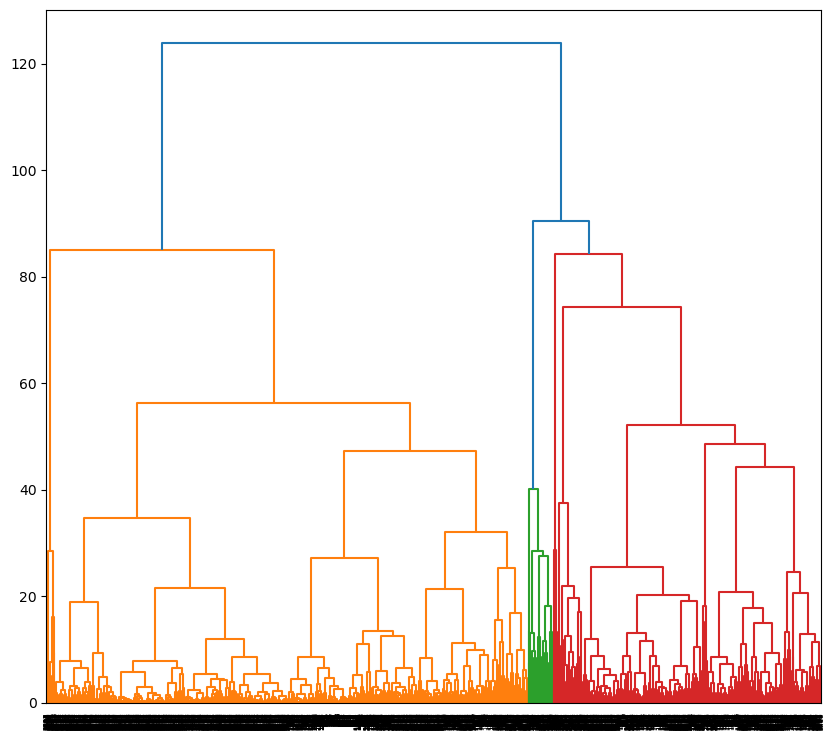

In [28]:
lk = hierarchy.linkage(X,method='ward')
plt.figure(figsize= (10,9))
dendrogram= hierarchy.dendrogram(lk, leaf_rotation= 90)
plt.show()

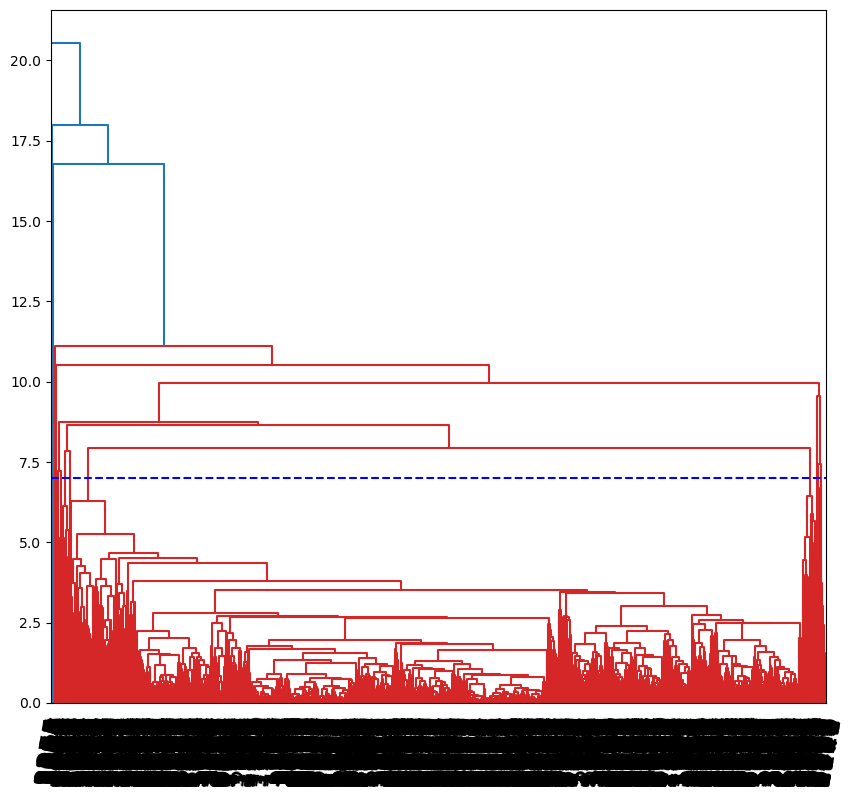

In [29]:
lk = hierarchy.linkage(X,method='average')
plt.figure(figsize=(10,9))
dendrogram= hierarchy.dendrogram(lk,leaf_rotation=80, leaf_font_size= 20)
plt.axhline(y = 7, linestyle='--',color='blue')
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 6)
label = model.fit_predict(data)
label

array([2, 2, 2, ..., 4, 4, 2], dtype=int64)

In [31]:
data.head

<bound method NDFrame.head of       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enr

In [32]:
data['cluster']= label
data.head()


Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   cluster  
0        2  
1        2  
2        2  
3        2  
4        4

In [33]:
# K-mean clustering 

from sklearn.cluster import KMeans

km = KMeans()
yp = km.fit_predict(X)
yp

array([0, 0, 0, ..., 2, 0, 0])

In [34]:
len(yp)

3999

In [35]:
km.cluster_centers_

array([[-3.79177032e-01, -1.42779431e-01, -7.36820598e-01,
        -9.82418871e-02, -6.27665798e-02, -6.08608606e-01,
        -6.94524614e-01, -2.06077679e-01, -2.28353756e-01,
        -3.05158719e-01, -7.66919299e-01],
       [ 2.26253503e-01, -1.49259977e-01,  6.58253271e-01,
        -9.82418871e-02, -4.81516826e-02,  2.14048236e-01,
         5.67200163e-01, -2.11408232e-01, -2.34284927e-01,
         1.88591337e-01, -7.66919299e-01],
       [-1.47112105e-01, -5.74268381e-02, -2.25903416e-01,
        -9.82418871e-02, -6.27665798e-02, -2.50963642e-01,
        -8.50051993e-02, -3.18876434e-02, -2.36668093e-02,
         6.60554328e-02,  1.30391816e+00],
       [ 1.12364494e+00,  4.61979282e-01,  1.26907367e-01,
        -9.82418871e-02, -6.27665798e-02,  7.27044064e-01,
         1.87466783e+00,  4.28887761e+00,  4.49068486e+00,
         2.80822647e-01,  8.93481906e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
  

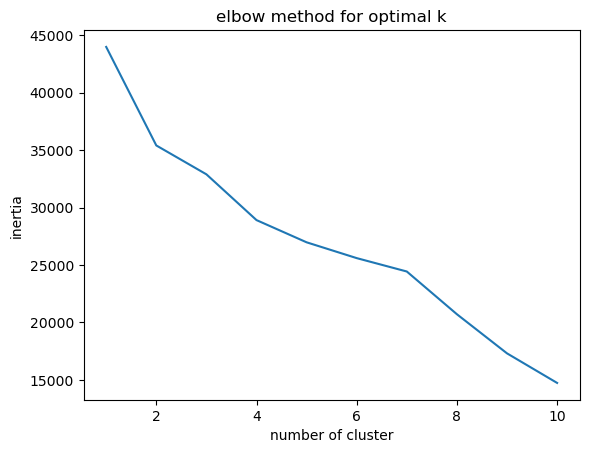

In [36]:
# Elbow curve 

inertia = []
K= range(1,11)

for k in K:
    kmean= KMeans(n_clusters= k, random_state=42)
    kmean.fit(X)
    inertia.append(kmean.inertia_)
plt.plot(K,inertia)
plt.xlabel('number of cluster')
plt.ylabel('inertia')
plt.title('elbow method for optimal k')
plt.show()


For k=2, silhouette score=0.325
For k=3, silhouette score=0.267
For k=4, silhouette score=0.191
For k=5, silhouette score=0.201
For k=6, silhouette score=0.211
For k=7, silhouette score=0.222
For k=8, silhouette score=0.231
For k=9, silhouette score=0.242
For k=10, silhouette score=0.261


Text(0, 0.5, 'Silhouette Score')

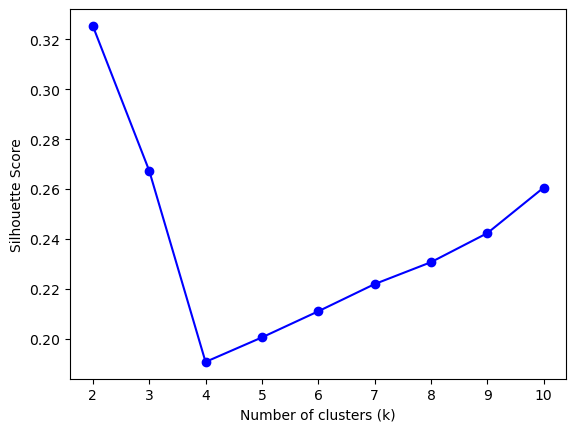

In [37]:
from sklearn.metrics import silhouette_score

scores = []
K = range(2, 11)  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)
    print(f"For k={k}, silhouette score={score:.3f}")
plt.plot(K, scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

In [40]:
Kmean= KMeans(n_clusters = 2, random_state= 42)
label= Kmean.fit_predict(X)

data['cluster']= label
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        0

In [41]:
data['cluster'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       0
       ..
3994    1
3995    1
3996    1
3997    1
3998    1
Name: cluster, Length: 3999, dtype: int32>

In [60]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.5, min_samples= 5)
label= dbscan.fit_predict(X)

data['cluster_dbscan']= label
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   cluster  cluster_dbscan  
0        1               0  
1        1               0  
2        1               0  
3        1               0  
4        0              -1

In [61]:
data['cluster_dbscan'].value_counts()

cluster_dbscan
 0     1453
-1     1413
 1      268
 5      235
 6      173
 9      115
 3      114
 4      111
 8       52
 10      21
 12       9
 13       9
 14       6
 2        5
 7        5
 11       5
 15       5
Name: count, dtype: int64

In [62]:

if len(set(label)) > 1 and -1 not in set(label):
    score = silhouette_score(X, label)
    print("Silhouette Score:", score)
else:
    print("Too much noise or only 1 cluster formed.")


Too much noise or only 1 cluster formed.


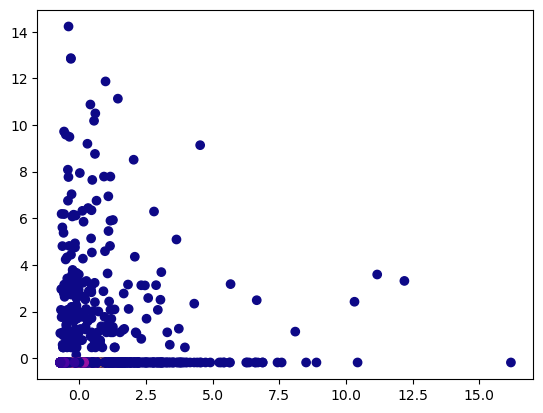

In [63]:
plt.scatter(X[:,0],X[:,1],c=label,cmap='plasma')
plt.show()

In [ ]:
## The objective of this assignment is to understand and implement three clustering algorithms: K-Means, Hierarchical Clustering, and DBSCAN. Clustering is an unsupervised learning method that groups data points based on similarity. We applied these algorithms to the given dataset after performing preprocessing and exploratory data analysis (EDA).

## The objective of this assignment is to understand and implement three clustering algorithms: K-Means, Hierarchical Clustering, and DBSCAN. Clustering is an unsupervised learning method that groups data points based on similarity. We applied these algorithms to the given dataset after performing preprocessing and exploratory data analysis (EDA).



### The dataset did not contain any missing values.

### No major outliers were detected during initial analysis.

### Features were scaled to ensure fair clustering performance.


### Histograms and scatter plots were plotted to understand feature distributions.

### A correlation heatmap helped in identifying related features.

### From EDA, we observed potential cluster structures in the dataset.




### 4.1 K-Means Clustering

### Used the Elbow Method to select optimal number of clusters.

### Elbow curve suggested best k = 2.

### Silhouette score at k = X: 0.325.




### 4.2 Hierarchical Clustering

### Implemented using different linkage methods: single, complete, average, ward.

### Dendrogram visualization helped to determine clusters.

### Best separation observed with ward linkage.



### 4.3 DBSCAN

### Parameters tested: eps 0.5, min_samples =5

### DBSCAN identified X clusters + Y noise points.



### Comparison:

### K-Means worked well for this dataset but required predefining k.

### Hierarchical provided a detailed structure but may be slower for large data.

### DBSCAN detected noise/outliers but was sensitive to parameter tuning. 